In [8]:
pip install requests beautifulsoup4 selenium pandas


  Using cached selenium-4.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached trio-0.29.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached trio_websocket-0.12.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached attrs-25.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
Using cached selenium-4.28.1-py3-none-any.whl (9.5 MB)
Using cached trio-0.29.0-py3-none-any.whl (492 kB)
Using cached trio_websocket-0.12.1-py3-none-any.whl (21 kB)
Using cached attrs-25.1.0-py3-none-any.whl (63 kB)
Using cached outcome-1.3.0.post0-py2.py3-none-any.whl (10 kB)
Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
Note: you may need to restart the kernel to use updated packages.


In [14]:
from selenium import webdriver
import os

# Spécifier le chemin COMPLET de ChromeDriver
chrome_driver_path = r"C:\Users\NOURA\Downloads\chromedriver-win64\chromedriver.exe"

# Vérifier si le fichier existe
if not os.path.exists(chrome_driver_path):
    raise FileNotFoundError(f"ChromeDriver introuvable : {chrome_driver_path}")

# Configurer Selenium
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Mode sans interface graphique

# Lancer ChromeDriver (Ne pas utiliser `executable_path`)
driver = webdriver.Chrome(options=options)

# Tester en ouvrant Google
driver.get("https://www.google.com")
print("ChromeDriver fonctionne correctement !")

# Fermer le navigateur
driver.quit()



ChromeDriver fonctionne correctement !


In [34]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup


In [36]:

# Configurer Selenium
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Mode sans interface graphique
driver = webdriver.Chrome(options=options)


In [48]:

# Configurer Selenium
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Mode sans interface graphique
driver = webdriver.Chrome(options=options)

# Ouvrir CoinMarketCap
url = "https://coinmarketcap.com/"
driver.get(url)

# Attendre que le tableau soit chargé
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, "tbody tr"))
)

# Extraire les lignes du tableau
rows = driver.find_elements(By.CSS_SELECTOR, "tbody tr")

crypto_data = []
for row in rows[:30000]:  # Scraper les 100 premières cryptos
    try:
        rank = row.find_element(By.CSS_SELECTOR, "td:nth-child(1)").text.strip()  # Rang de la crypto
        name = row.find_element(By.CSS_SELECTOR, "td:nth-child(3) p").text.strip()  # Nom
        price = row.find_element(By.CSS_SELECTOR, "td:nth-child(4)").text.strip()  # Prix
        market_cap = row.find_element(By.CSS_SELECTOR, "td:nth-child(8)").text.strip()  # Market Cap
        volume = row.find_element(By.CSS_SELECTOR, "td:nth-child(9)").text.strip()  # Volume 24h

        crypto_data.append([rank, name, price, market_cap, volume])
    except Exception as e:
        print(f"Erreur sur une ligne : {e}")

# Fermer Selenium
driver.quit()

# Convertir en DataFrame
df = pd.DataFrame(crypto_data, columns=["Rang", "Nom", "Prix", "Capitalisation", "Volume 24h"])
print(df)

# Sauvegarder en CSV
df.to_csv("crypto_market_data.csv", index=False)
print("Données enregistrées dans crypto_market_data.csv")


Erreur sur une ligne : Message: no such element: Unable to locate element: {"method":"css selector","selector":"td:nth-child(3) p"}
  (Session info: chrome=133.0.6943.99); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF6AAFF6F15+28773]
	(No symbol) [0x00007FF6AAF62600]
	(No symbol) [0x00007FF6AADF8FAA]
	(No symbol) [0x00007FF6AAE4F286]
	(No symbol) [0x00007FF6AAE4F4BC]
	(No symbol) [0x00007FF6AAE41C6C]
	(No symbol) [0x00007FF6AAE7728F]
	(No symbol) [0x00007FF6AAE41B36]
	(No symbol) [0x00007FF6AAE77460]
	(No symbol) [0x00007FF6AAE9F6F3]
	(No symbol) [0x00007FF6AAE77023]
	(No symbol) [0x00007FF6AAE3FF5E]
	(No symbol) [0x00007FF6AAE411E3]
	GetHandleVerifier [0x00007FF6AB34425D+3490733]
	GetHandleVerifier [0x00007FF6AB35BA43+3586963]
	GetHandleVerifier [0x00007FF6AB35147D+3544525]
	GetHandleVerifier [0x00007FF6AB0BC9DA+838442]
	(No symbol) [0x00007FF6AA

In [50]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de CoinGecko
url = "https://www.coingecko.com/en"

# Faire une requête GET
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Parser le HTML avec BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Extraire les lignes du tableau
rows = soup.select("tbody tr")

crypto_data = []
for row in rows[:10]:  # Scraper les 10 premières cryptos
    name = row.select_one(".tw-hidden").text.strip()
    price = row.select_one(".td-price span").text.strip()
    market_cap = row.select_one(".td-market_cap span").text.strip()
    volume = row.select_one(".td-liquidity_score span").text.strip()
    
    crypto_data.append([name, price, market_cap, volume])

# Convertir en DataFrame
df = pd.DataFrame(crypto_data, columns=["Nom", "Prix", "Capitalisation", "Volume"])
print(df)

# Sauvegarder en CSV
df.to_csv("coingecko_market_data.csv", index=False)
print(" Données enregistrées dans coingecko_market_data.csv")


Empty DataFrame
Columns: [Nom, Prix, Capitalisation, Volume]
Index: []
 Données enregistrées dans coingecko_market_data.csv


In [52]:
pip install python-binance



  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/113.7 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/113.7 kB 1.3 MB/s eta 0:00:01
   ------------------------ -------------- 71.7/113.7 kB 975.2 kB/s eta 0:00:01
   -------------------------------------  112.6/113.7 kB 939.4 kB/s eta 0:00:01
   -------------------------------------- 113.7/113.7 kB 827.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/295.7 kB ? eta -:--:--
   --------------- ------------------------ 112.6/295.7 kB 3.3 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/295.7 kB 1.8 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/295.7 kB 1.6 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/295.7 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/295.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 295.7/295.7 kB 1.2 MB/s eta 0

In [64]:

# Configurer Selenium
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Mode sans interface graphique
driver = webdriver.Chrome(options=options)


In [66]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
from bs4 import BeautifulSoup
import time


# URL du site à scraper
url = "https://cryptorank.io/all-coins-list"
driver.get(url)
time.sleep(15)  # Laisser le temps au JavaScript de charger les données

# Récupérer le contenu HTML de la page
soup = BeautifulSoup(driver.page_source, "html.parser")

# Extraire les données
coins = []
rows = soup.find_all("tr", class_="table__row")  # Adapter la classe CSS si besoin

for row in rows:
    try:
        name = row.find("a", class_="table__cell--name").text.strip()
        price = row.find("div", class_="table__cell--price").text.strip()
        change_24h = row.find("span", class_="table__cell--percent").text.strip()
        market_cap = row.find("div", class_="table__cell--market-cap").text.strip()
        volume_24h = row.find("div", class_="table__cell--volume").text.strip()
        supply = row.find("div", class_="table__cell--supply").text.strip()

        coins.append([name, price, change_24h, market_cap, volume_24h, supply])

    except AttributeError:
        continue  # Ignore les erreurs si certaines valeurs sont manquantes

# Fermer le navigateur
driver.quit()

# Convertir les données en DataFrame
df = pd.DataFrame(coins, columns=["Nom", "Prix", "Changement 24h", "Market Cap", "Volume 24h", "Supply"])
print(df.head())  # Afficher un aperçu

# Sauvegarder en CSV
df.to_csv("crypto_dataa.csv", index=False, encoding="utf-8")


Empty DataFrame
Columns: [Nom, Prix, Changement 24h, Market Cap, Volume 24h, Supply]
Index: []


In [68]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

# Chemin du WebDriver
webdriver_path = "C:\Users\NOURA\Downloads\chromedriver-win64\chromedriver.exe"

# Configuration de Selenium
chrome_options = Options()
chrome_options.add_argument("--headless")  # Mode sans interface graphique
service = Service(webdriver_path)  
driver = webdriver.Chrome(service=service, options=chrome_options)

# Accéder à la page
url = "https://cryptorank.io/all-coins-list"
driver.get(url)

# ✅ Attendre que le tableau apparaisse (ajuste le XPath si nécessaire)
try:
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, "table")))
    print("Tableau trouvé !")
except:
    print("⚠️ Erreur : Tableau non trouvé.")
    driver.quit()
    exit()

# ✅ Trouver toutes les lignes du tableau
rows = driver.find_elements(By.XPATH, "//table//tbody//tr")

# Extraction des données
data = []
for row in rows:
    columns = row.find_elements(By.TAG_NAME, "td")
    if len(columns) > 5:  # Vérifie si la ligne contient bien toutes les colonnes
        data.append([
            columns[1].text,  # Nom
            columns[2].text,  # Prix
            columns[3].text,  # Changement 24h
            columns[4].text,  # Market Cap
            columns[5].text,  # Volume 24h
            columns[6].text   # Supply
        ])

# Conversion en DataFrame
df = pd.DataFrame(data, columns=["Nom", "Prix", "Changement 24h", "Market Cap", "Volume 24h", "Supply"])
print(df)

# Fermer le driver
driver.quit()


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2186525236.py, line 10)

   timestamp          price
0 2025-01-21  101764.908602
1 2025-01-22  106182.236820
2 2025-01-23  103673.535095
3 2025-01-24  104067.609912
4 2025-01-25  104835.192536


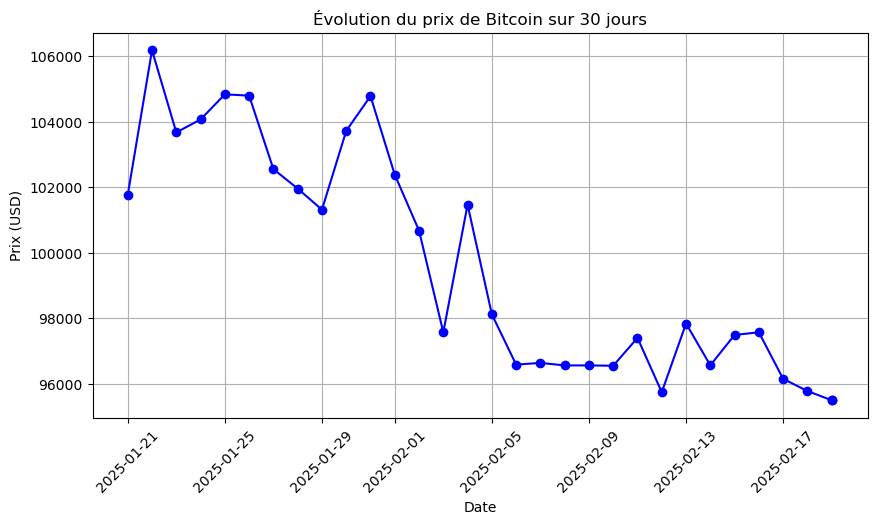

In [70]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fonction pour récupérer les données de prix historiques
def get_crypto_prices(crypto_id="bitcoin", days=30, currency="usd"):
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart"
    params = {
        "vs_currency": currency,
        "days": days,
        "interval": "daily"
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    # Convertir en DataFrame
    prices = data["prices"]
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")  # Convertir en date
    return df

# Récupérer les prix de Bitcoin sur 30 jours
df = get_crypto_prices("bitcoin", 30)

# Afficher les premières lignes
print(df.head())

# Tracer l'évolution du prix
plt.figure(figsize=(10,5))
plt.plot(df["timestamp"], df["price"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Prix (USD)")
plt.title("Évolution du prix de Bitcoin sur 30 jours")
plt.grid()
plt.xticks(rotation=45)
plt.show()
